# K-Means

Um dos mais famosos e utilizados algoritmos de clusterização é o K-Means. Ele trabalha definindo um valor, um exemplo de dado, ou medida/característica principal para cada cluster (a letra K do nome faz referência aos ‘k’ clusters). Para cada dado ou objeto a ser classificado, é calculada a distância desse novo dado para o valor base central de cada cluster. O novo dado será agrupado ao cluster que estiver mais próximo das características desse novo dado. Pensando no caso da classificação das imagens da natureza, um ponto principal de um cluster poderia ser uma imagem de uma árvore: toda nova imagem que tiver uma árvore ou parte de uma árvore poderá entrar nesse cluster, mas imagens apenas com rios ou flores ficarão distantes dessa classificação e deverão se classificar em outros clusters

In [11]:
import pandas as pd

#Ler os dados da base, e um pequeno tratamento já que o mesmo não possui nome nas colunas
df = pd.read_csv('kmeans.txt', sep=';', names=['atr1', 'atr2', 'class'])
df = df.loc[:,['atr1', 'atr2', 'class']]
df

,atr1,atr2,class
0,1.9826,0.5612,1
1,0.9935,-0.4157,1
2,-2.1958,-1.5015,1
3,3.2972,0.7934,1
4,-3.5281,-1.2230,1
...,...,...,...
295,-0.5509,3.0929,2
296,0.8350,2.3592,2
297,-0.3550,3.2638,2
298,-0.4853,3.0531,2


#### Visualizando os dados graficamente

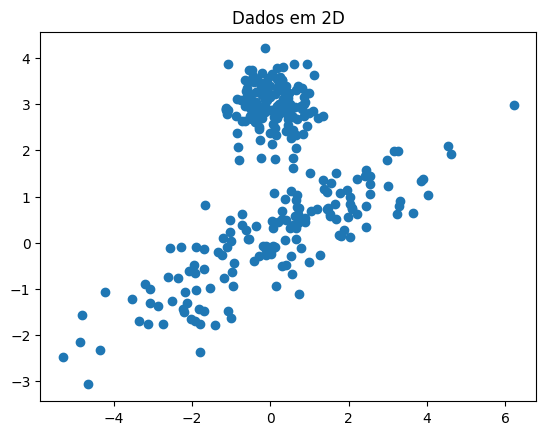

In [12]:
import matplotlib.pyplot as plt

graf1, ax = plt.subplots()

ax.scatter(df['atr1'], df['atr2'])
ax.set_title('Dados em 2D')
plt.show()

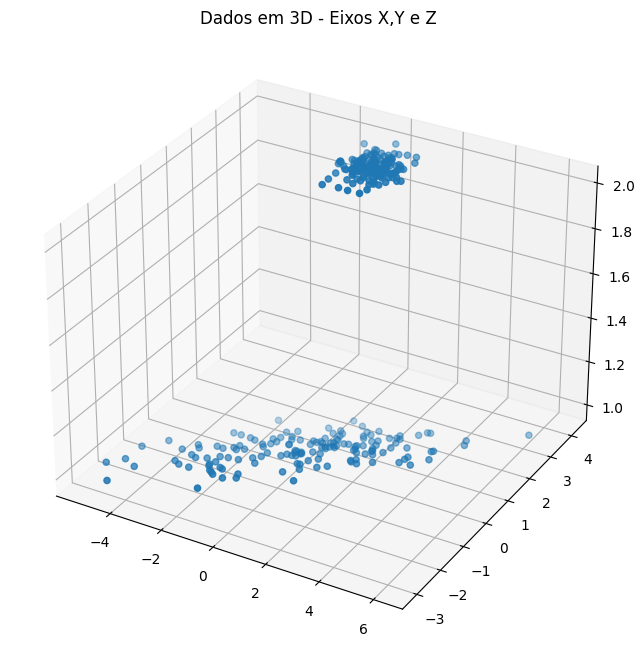

In [13]:
# Gráfico da dispersão dos dados em 3D
graf2 = plt.figure(figsize=(12, 8))
ax = graf2.add_subplot(projection='3d')
ax.set_title('Dados em 3D - Eixos X,Y e Z')
ax.scatter(df['atr1'], df['atr2'], df['class'])
plt.show()

Até agora só vimos duas simples disposições de dados no espeço bidimensional e tridimensional. Vamos aplicar de fato o K-MEANS.
Inicialmente vamos iniciar o valor de K com 2, dessa forma teremos 2 clusters inicialmente, resultando em 2 agrupamentos.

In [14]:
from sklearn.cluster import KMeans

K = 4
kmeans = KMeans(n_clusters=K, random_state=0, n_init="auto").fit(df)

Visualizando os agrupamentos(clusters) e os centros

Agrupamentos:

In [15]:
kmeans.labels_

array([3, 2, 1, 3, 1, 2, 3, 2, 1, 2, 2, 2, 2, 3, 2, 1, 3, 3, 3, 1, 2, 1,
       3, 3, 3, 3, 1, 2, 3, 2, 2, 1, 3, 2, 3, 1, 2, 2, 2, 1, 2, 2, 3, 2,
       2, 1, 1, 1, 3, 2, 3, 2, 1, 1, 1, 1, 3, 1, 2, 2, 2, 3, 2, 1, 2, 2,
       1, 2, 3, 2, 3, 3, 3, 2, 3, 1, 2, 2, 2, 2, 1, 2, 1, 2, 3, 1, 3, 1,
       3, 3, 1, 3, 3, 1, 2, 1, 2, 3, 2, 2, 2, 1, 1, 3, 1, 3, 3, 1, 2, 3,
       2, 1, 3, 3, 2, 2, 3, 2, 1, 2, 1, 1, 1, 3, 2, 1, 2, 2, 3, 2, 1, 3,
       2, 3, 2, 1, 2, 2, 2, 2, 2, 2, 2, 2, 1, 3, 3, 2, 3, 3, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0], d

Centros:

In [16]:
kmeans.cluster_centers_

array([[ 0.03202133,  2.98466   ,  2.        ],
       [-2.54924146, -1.28141707,  1.        ],
       [ 0.06489524,  0.17779365,  1.        ],
       [ 2.48022609,  1.0726087 ,  1.        ]])

Vamos visualizar a disposição dos dados no 2D e 3D


2D:

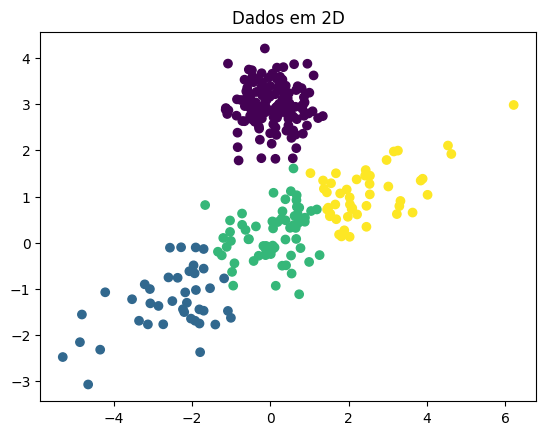

In [17]:
graf3, ax = plt.subplots()

ax.scatter(df['atr1'], df['atr2'], c=kmeans.labels_)
ax.set_title('Dados em 2D')
plt.show()

3D:

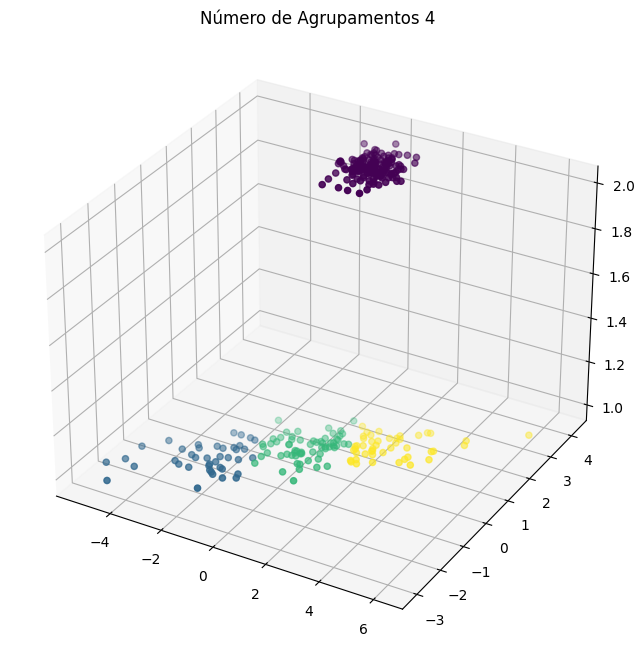

In [18]:
graf4 = plt.figure(figsize=(12, 8))
ax = graf4.add_subplot(projection='3d')
ax.set_title(f'Número de Agrupamentos {K}')
ax.scatter(df['atr1'], df['atr2'], df['class'], c=kmeans.labels_)

# Método do Cotovelo

#### Avaliando o melhor valor de K:

Massa, temos os dados agrupados a partir de um valor K que chutamos. Mas como podemos descobrir o melhor valor K?
É nesse momento que o Método do Cotovelo entra em campo:

A ideia é rodar o KMeans para vários quantidades diferentes de clusters e dizer qual dessas quantidades é o número ótimo de clusters. O que geralmente acontece ao aumentar a quantidade de clusters no KMeans é que as diferenças entre clusters se tornam muito pequenas, e as diferenças das observações intra-clusters vão aumentando. Então é preciso achar um equilíbrio em que as observações que formam cada agrupamento sejam o mais homogêneas possível e que os agrupamentos formados sejam o mais diferentes um dos outros.

Valor de K: 1 - Inércia: 1645.2060252759336
Valor de K: 2 - Inércia: 826.1962959835457
Valor de K: 3 - Inércia: 393.4981205057696
Valor de K: 4 - Inércia: 255.25686646054345
Valor de K: 5 - Inércia: 224.32650538121766
Valor de K: 6 - Inércia: 184.43818127500367
Valor de K: 7 - Inércia: 172.9533029796955
Valor de K: 8 - Inércia: 138.37569292709827
Valor de K: 9 - Inércia: 131.95231711904594
Valor de K: 10 - Inércia: 104.3744293001543


Text(0.5, 1.0, 'Método do Cotovelo')

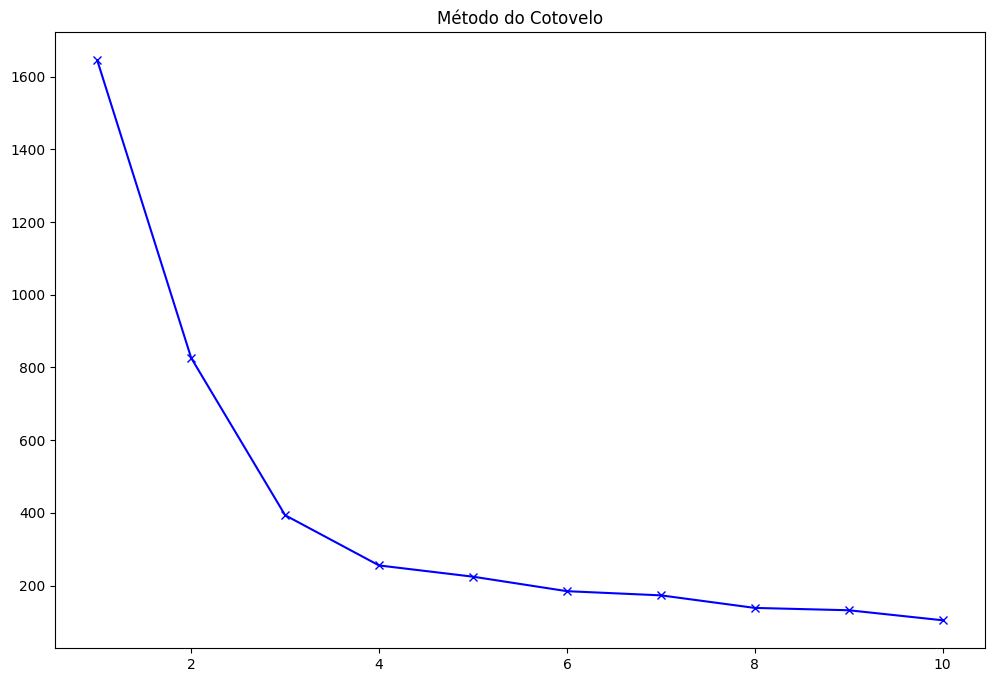

In [19]:
valores_k = []
inercias = []

for i in range(1, 11):
    kmeans = KMeans(n_clusters=i, random_state=0, n_init="auto").fit(df)
    valores_k.append(i)
    inercias.append(kmeans.inertia_)
    print(f'Valor de K: {i} - Inércia: {kmeans.inertia_}')

graf5 = plt.figure(figsize=(12, 8))
ax = graf5.add_subplot()
ax.plot(valores_k, inercias, 'bx-')
ax.set_title('Método do Cotovelo')

# Conclusão

Baseado no Gráfico, o valor a ser escolhido de K deve ser o 4, pois é o momento no qual a função tende uma taxa de linearieadade.

# Referências

https://acervolima.com/metodo-do-cotovelo-para-o-valor-ideal-de-k-em-kmeans/

https://www.hashtagtreinamentos.com/k-means-para-clusterizar-ciencia-dados

https://medium.com/cwi-software/entendendo-clusters-e-k-means-56b79352b452